### Objective: 
The goal of this notebook is for exploratory analysis of the images. 
Using this I am going to rearrange the images as needed into training and validation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import getcwd, listdir, mkdir, rename
from os.path import split, join, exists
from scipy.misc import imread, imsave, imresize, imshow
import skimage as sk
from skimage.io import imshow
%matplotlib inline

In [2]:
base = join(split(split(getcwd())[0])[0],'data_local')
train_dir = join(base, 'train')


In [3]:
# get the fish dirs
types = [d for d in listdir(train_dir)[1:]]
dirs = [join(train_dir,d) for d in types]

In [4]:
# get the size of each
number_files ={types[i]:len(listdir(dirs[i])) for i in range(8)}


In [5]:
number_files

{'ALB': 1719,
 'BET': 200,
 'DOL': 117,
 'LAG': 67,
 'NoF': 465,
 'OTHER': 299,
 'SHARK': 176,
 'YFT': 734}

In [6]:
# get the file size

def get_file_info(f):
    img = imread(f)
    width, height, _ = img.shape
    return width, height
    
widths = []
heights =[]
fish_types = []
image_name = []
file_names = []

count =0
for fish in types: 
    for f in listdir(join(train_dir, fish)):
        image_name.append(f)
        fish_types.append(fish)
        
        file_name = join(train_dir,fish,f)
        file_names.append(file_name)
        w, h= get_file_info(file_name)
        widths.append(w)
        heights.append(h)
        
image_info = pd.DataFrame({
        'file_name':file_names,
        'fish_type': fish_types,
        'width':widths,
        'height':heights
    })


In [7]:
print image_info.height.min()
print image_info.width.min()

1192
670


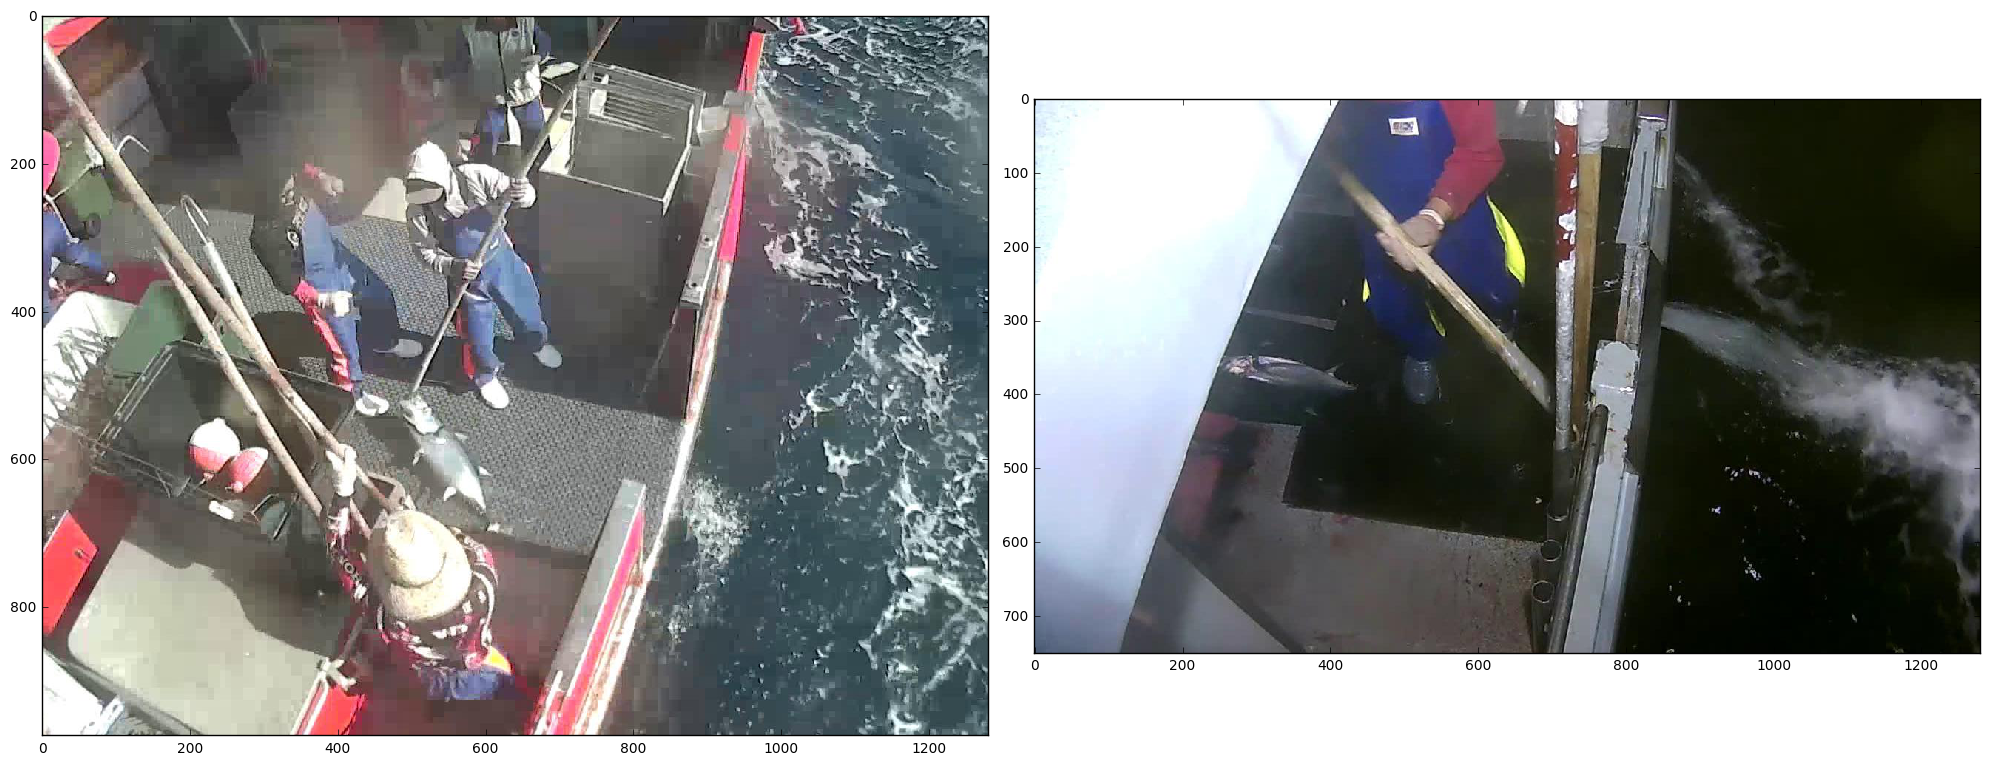

In [8]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
imshow(file_names[0])
plt.subplot(2,2,2)
imshow(file_names[1])
plt.subplot(2,2,3)
imshow(file_names[2])
plt.subplot(2,2,4)
imshow(file_names[3])


In [9]:
imread(file_names[0]).shape

(720, 1280, 3)

In [11]:
validation = join(base,'validation')

In [13]:
# make validation directories if not present
print listdir(validation)

for t in types: 
    d = join(validation, t)
    print d
    if not exists(d): 
        mkdir(d)
    
print listdir(validation)

['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']
/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/validation/ALB
/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/validation/BET
/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/validation/DOL
/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/validation/LAG
/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/validation/NoF
/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/validation/OTHER
/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/validation/SHARK
/Users/crivera5/Documents/NonIntuitProjects/Kaggle/ClassifiyingFish/data_local/validation/YFT
['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']


This was code that I used to move files 
```python
grouped = image_info.groupby('fish_type')

for fish_type, images in grouped:
    df = images.reset_index()
    total = len(df)
    start = int(total*0.9)
    
    for i in xrange(start, total): 
        old = df.loc[i]['file_name']
        new = join(validation, fish_type, split(old)[1])
        rename(old, new)


        


```python

In [38]:
for t in types:
    print t
    print 'train', len(listdir(join(train_dir, t)) )
    print 'validation',len(listdir(join(validation, t))) 
    print '\n'

ALB
train 1547
validation 172


BET
train 180
validation 20


DOL
train 105
validation 12


LAG
train 60
validation 7


NoF
train 418
validation 47


OTHER
train 269
validation 30


SHARK
train 158
validation 18


YFT
train 660
validation 74




In [40]:
image_info['fish_type'].value_counts()

ALB      1719
YFT       734
NoF       465
OTHER     299
BET       200
SHARK     176
DOL       117
LAG        67
Name: fish_type, dtype: int64

### Playing with the genertor to understand how to use it best

In [81]:
from keras.preprocessing.image import ImageDataGenerator

In [122]:
img_width =512
img_height = 512
datagen = ImageDataGenerator(rescale = 1. / 255)
generator = datagen.flow_from_directory(
        train_dir,
        classes = types,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)


Found 3397 images belonging to 8 classes.


In [123]:
x, y= generator.next()

[ 1.  0.  0.  0.  0.  0.  0.  0.]


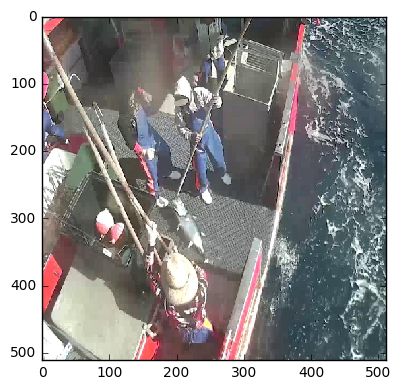

In [127]:
imshow(x[2])
print y[2]

In [125]:
types

['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

In [131]:
generator.nb_sample

3397